In [1]:
import time
import random
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore") 
from sklearn.preprocessing import StandardScaler

In [2]:
os.chdir(r"C:\machine learning\random forest")

# data preprocessing

In [3]:
fd=pd.read_excel('bank.xlsx')


In [4]:
fd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
fd.shape

(11162, 17)

In [6]:
fd.info()#informatio of thew data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
fd.ndim#no of the dimension

2

# missing values treatment

In [8]:
def fun1(data):
    g2=data.isna().sum()/data.count()
    #g2["count"]=data.isna().sum()
    return g2

In [9]:
fun1(fd)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

# eda(exploratory data analysis)

# univariate analysis

In [10]:
fd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [11]:
fd.select_dtypes(["int64","float64"]).columns#numerical columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

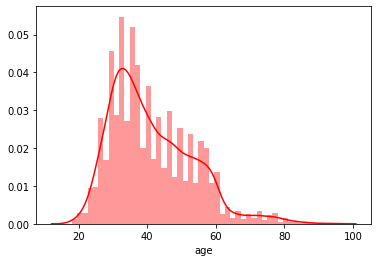

In [12]:
sns.distplot(fd["age"],color="red")

#we have consider the plot probability distribution of 20 to 60 age have more distribution of customers

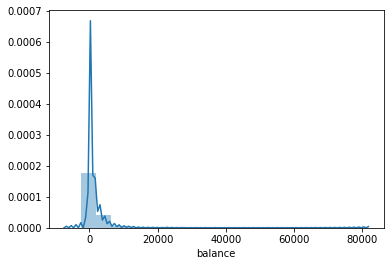

In [13]:
sns.distplot(fd["balance"],bins=20)

In [14]:
fd[["balance"]]

,balance
0,2343
1,45
2,1270
3,2476
4,184
...,...
11157,1
11158,733
11159,29
11160,0


we have to see that in this plot the range of the more customers has balance 0 to 20000 more customers ,
more than 20000 balance has less customer in this

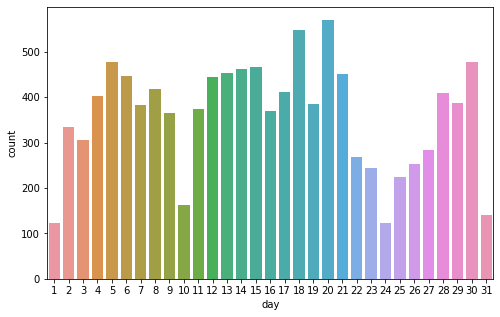

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(fd["day"])

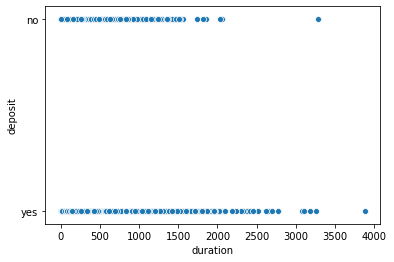

In [16]:
sns.scatterplot(fd["duration"],fd["deposit"])#duration of time of customer

In [17]:
#make a copy of the data
fd1=fd

In [18]:
def fun(data,ge):#dataset,gender,exited
    g1=data.groupby([ge])[ge].agg(["count"])
    h2=g1.sum()
    g1["ratio"]=g1/h2*100
    return g1

In [19]:
fun(fd,"deposit")

,count,ratio
deposit,,
no,5873,52.616019
yes,5289,47.383981


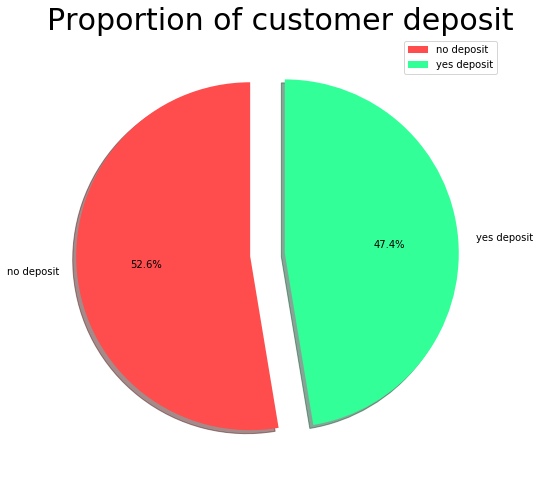

In [20]:
labels = ['no deposit',"yes deposit" ]


sizes = [fd.deposit[fd['deposit']=="no"].count(), fd.deposit[fd['deposit']=="yes"].count(),
         ]
explode = (0.2,0)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=["#ff4d4d","#33ff99"])
plt.legend()
#ax1.axis('equal')
plt.title("Proportion of customer deposit ", size = 30)
plt.show()

In [21]:
def fun2(data,ge,ex):#dataset,gender,exited
    g1=data.groupby([ge,ex])[ex].agg(["count"])
    g2=data.groupby(ge)[ex].agg(["count"])
    #g1["pct"]=100*g1.div(g2,level=ge)
    g1["ratio"]=g1/g2*100
    return g1

In [22]:
fd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [23]:
month=fun2(fd,"month","deposit")

In [24]:
month.nlargest(2,columns="count")

count      ratio
month deposit                  
may   no        1899  67.245042
      yes        925  32.754958

# working categorical for machine learning`

In [25]:
fd.select_dtypes(["category","object"]).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [26]:
fun(fd,"job")

,count,ratio
job,,
admin.,1334,11.951263
blue-collar,1944,17.416234
entrepreneur,328,2.938541
housemaid,274,2.454757
management,2566,22.988712
retired,778,6.970077
self-employed,405,3.628382
services,923,8.269127
student,360,3.225228


# job category so many values in the data of the job category we have to compile then we have to apply thre label coding


# make 3 categogries of job
1. admin and management,enterpenur make white collar
2. housemade nd services make pink collar job
3. student,retired,unknown,unemployment make other category
4. remaining same

In [27]:
fd["job"]=fd["job"].replace(["management","admin.","entrepreneur"],"white-collar")

fd["job"]=fd["job"].replace(["housemaid","services"],"pinkcollar")
fd["job"]=fd["job"].replace(["unemployed","student","unknown","retired"],"other")


In [28]:
fun(fd,"job")

,count,ratio
job,,
blue-collar,1944,17.416234
other,1565,14.020785
pinkcollar,1197,10.723885
self-employed,405,3.628382
technician,1823,16.332199
white-collar,4228,37.878516


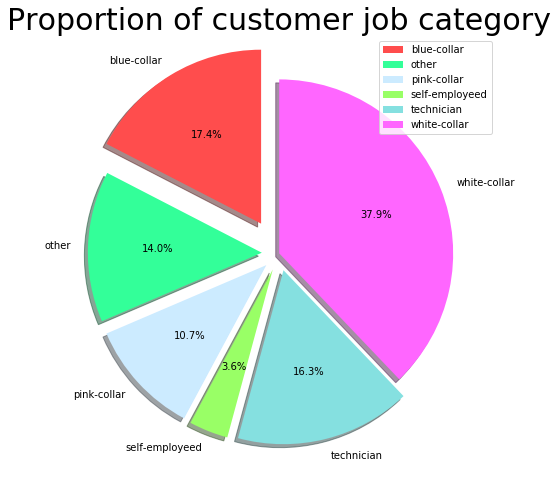

In [29]:
labels = ['blue-collar', 'other',"pink-collar","self-employeed","technician","white-collar"]
sizes = [fd.job[fd['job']=="blue-collar"].count(), fd.job[fd['job']=="other"].count(),
         fd.job[fd['job']=="pinkcollar"].count(),fd.job[fd['job']=="self-employed"].count(),
        fd.job[fd['job']=="technician"].count(),fd.job[fd['job']=="white-collar"].count()]
explode = (0.2, 0.1,0.1,0.1,0.1,0)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=["#ff4d4d","#33ff99","#ccebff","#99ff66","#85e0e0","#ff66ff"])
plt.legend()
#ax1.axis('equal')
plt.title("Proportion of customer job category", size = 30)
plt.show()



#'
we have to seen that the job category white collar the job customers are maximum i.e 37.9% in the relation with the bank
self employeed are very less the relation with deposit with bank only 3.6%

admin type and mangement type customers are more to buying the fd deposit policy

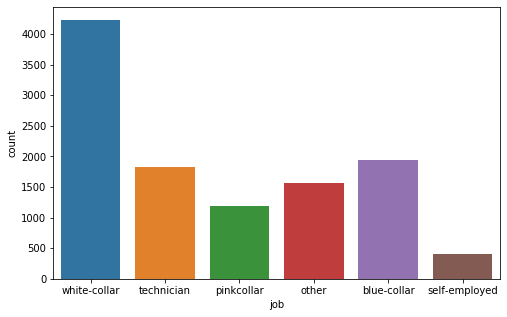

In [30]:
plt.figure(figsize=(8,5))

sns.countplot(fd["job"])

In [31]:
fd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [32]:
fun(fd,"marital")

,count,ratio
marital,,
divorced,1293,11.583946
married,6351,56.898405
single,3518,31.517649


In [33]:
fd["marital"]=fd["marital"].replace({"divorced":"divorced/widow"})

In [34]:
fun(fd,"marital")

,count,ratio
marital,,
divorced/widow,1293,11.583946
married,6351,56.898405
single,3518,31.517649


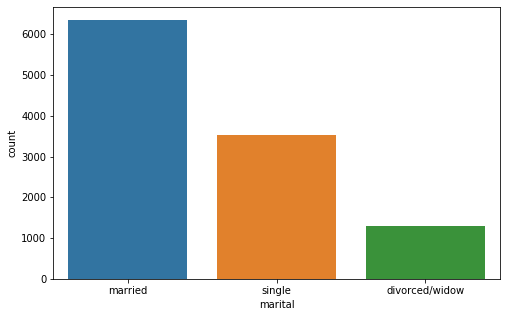

In [35]:
plt.figure(figsize=(8,5))

sns.countplot(fd["marital"])

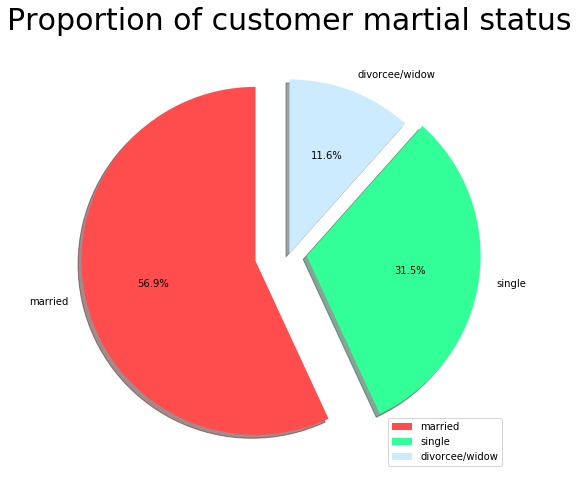

In [36]:
labels = ['married', 'single',"divorcee/widow"]


sizes = [fd.marital[fd['marital']=="married"].count(), fd.marital[fd['marital']=="single"].count(),
         fd.marital[fd['marital']=="divorced/widow"].count(),]
explode = (0.2, 0.1,0)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=["#ff4d4d","#33ff99","#ccebff"])
plt.legend()
#ax1.axis('equal')
plt.title("Proportion of customer martial status", size = 30)
plt.show()

In [37]:
fun(fd,"education")

,count,ratio
education,,
primary,1500,13.438452
secondary,5476,49.059308
tertiary,3689,33.049633
unknown,497,4.452607


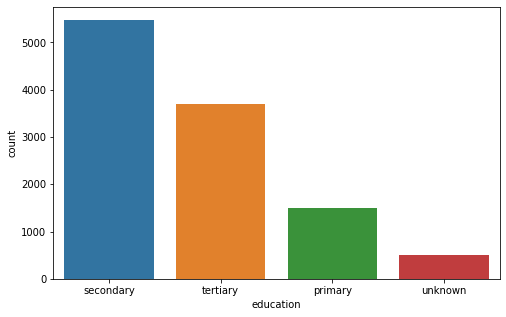

In [38]:
plt.figure(figsize=(8,5))

sns.countplot(fd["education"])

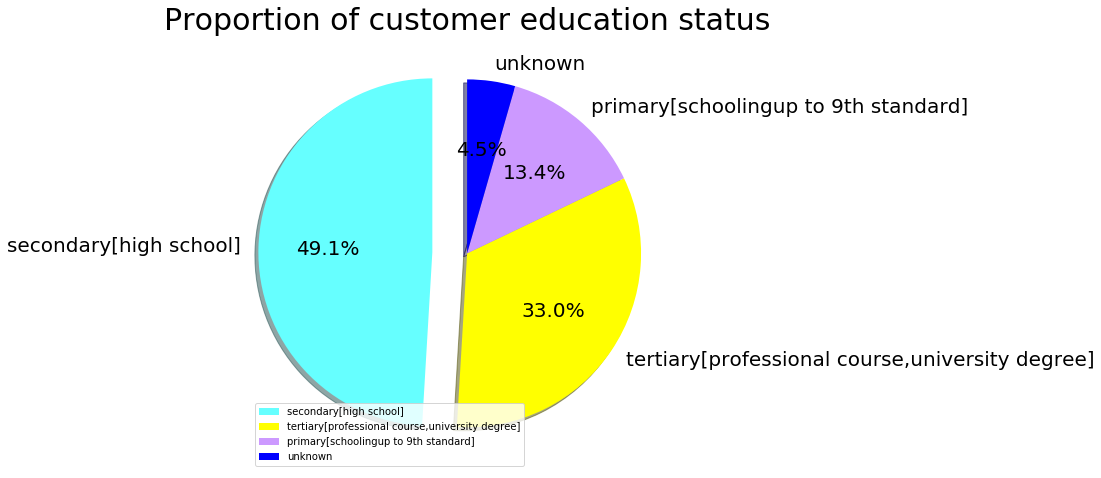

In [39]:
labels = ['secondary[high school]', 'tertiary[professional course,university degree]',"primary[schoolingup to 9th standard]","unknown"]


sizes = [fd.education[fd['education']=="secondary"].count(), fd.education[fd['education']=="tertiary"].count(),
fd.education[fd['education']=="primary"].count(),fd.education[fd['education']=="unknown"].count() ,   ]
explode = (0.2, 0,0,0)
textprops = {"fontsize":20}#
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=["#66ffff","#ffff00","#cc99ff","b"],textprops=textprops)
plt.legend()
#ax1.axis('equal')
plt.title("Proportion of customer education status", size = 30)
plt.show()

In [40]:
fd.select_dtypes(["category","object"]).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [41]:
fun(fd,"default")

,count,ratio
default,,
no,10994,98.494893
yes,168,1.505107


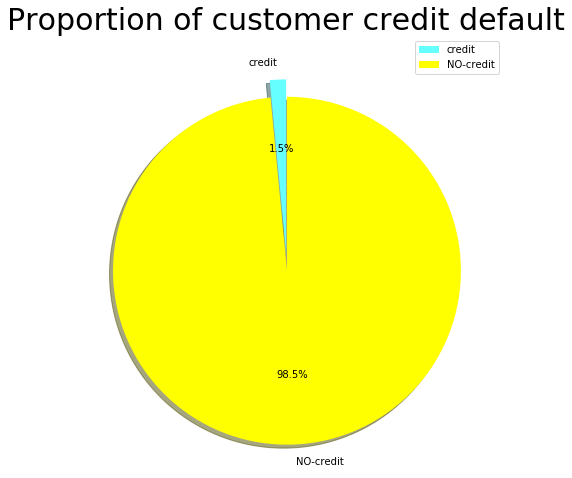

In [42]:
labels = ['credit', 'NO-credit']


sizes = [fd.default[fd['default']=="yes"].count(), fd.default[fd['default']=="no"].count(),
         ]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=["#66ffff","#ffff00"])
plt.legend()
#ax1.axis('equal')
plt.title("Proportion of customer credit default", size = 30)
plt.show()

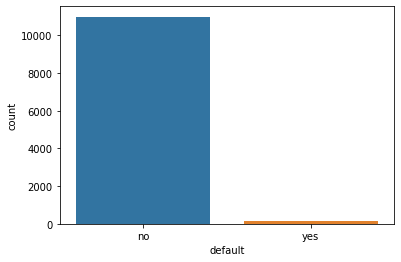

In [43]:
sns.countplot(fd["default"])

In [44]:
fun(fd,"housing")

,count,ratio
housing,,
no,5881,52.68769
yes,5281,47.31231


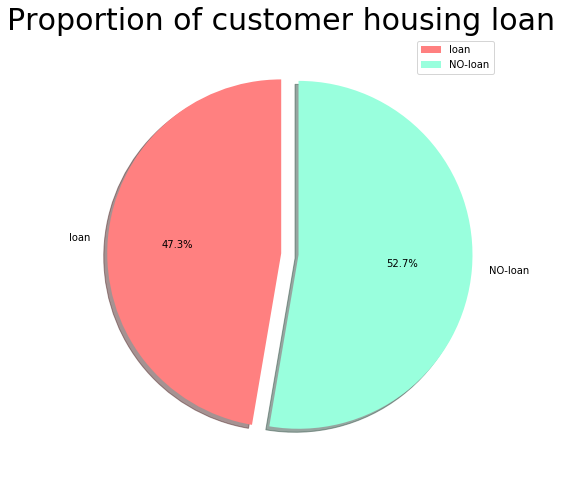

In [45]:
labels = ['loan', 'NO-loan']
c=["#ff8080","b"]

sizes = [fd.housing[fd['housing']=="yes"].count(), fd.housing[fd['housing']=="no"].count(),
         ]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=["#ff8080","#99ffdd"])
plt.legend()
#ax1.axis('equal')
plt.title("Proportion of customer housing loan", size = 30)
plt.show()

In [46]:
fun(fd,"loan")

,count,ratio
loan,,
no,9702,86.919907
yes,1460,13.080093


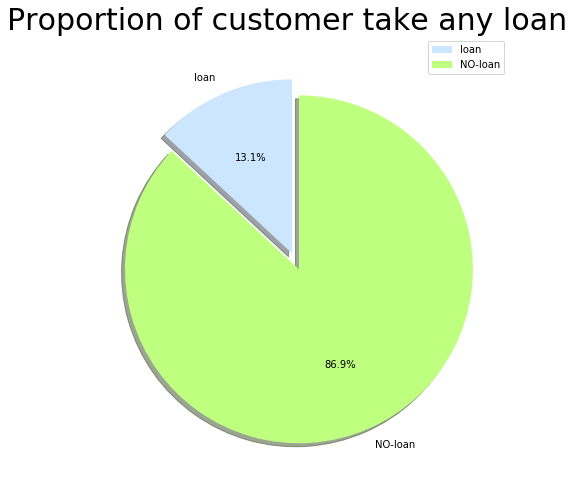

In [47]:
labels = ['loan', 'NO-loan']
c=["#cce6ff","b"]

sizes = [fd.loan[fd['loan']=="yes"].count(), fd.loan[fd['loan']=="no"].count(),
         ]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=["#cce6ff","#bfff80"])
plt.legend()
#ax1.axis('equal')
plt.title("Proportion of customer take any loan ", size = 30)
plt.show()

In [48]:
fd.select_dtypes("object").columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [49]:
fun2(fd,"contact","deposit")

count      ratio
contact   deposit                  
cellular  no        3673  45.672718
          yes       4369  54.327282
telephone no         384  49.612403
          yes        390  50.387597
unknown   no        1816  77.408355
          yes        530  22.591645

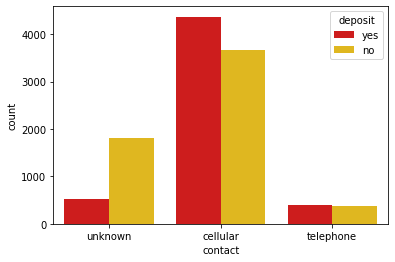

In [50]:
sns.countplot(fd["contact"],hue=fd["deposit"],palette="hot")

In [51]:
fun(fd,"poutcome")

,count,ratio
poutcome,,
failure,1228,11.001613
other,537,4.810966
success,1071,9.595055
unknown,8326,74.592367


In [52]:
fd["poutcome"]=fd["poutcome"].replace({"unknown":"other"})

In [53]:
fun(fd,"poutcome")

,count,ratio
poutcome,,
failure,1228,11.001613
other,8863,79.403333
success,1071,9.595055


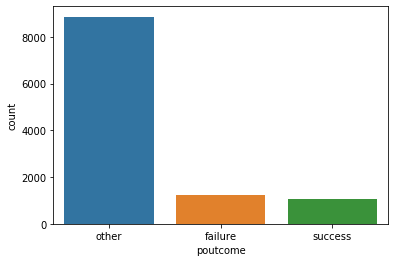

In [54]:
sns.countplot(fd["poutcome"])

In [55]:
fd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [56]:
def col(data):
    g1=data.columns
    return g1

In [57]:
col(fd)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [58]:
def selcol(data):
    g1=data.select_dtypes(["object","category"]).columns
    return g1

In [59]:
selcol(fd)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [60]:
#drop unnecessary columns

In [61]:
fd.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,other,yes
1,56,white-collar,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,other,yes


In [62]:
fun2(fd,"month","deposit")

count      ratio
month deposit                  
apr   no         346  37.486457
      yes        577  62.513543
aug   no         831  54.707044
      yes        688  45.292956
dec   no          10   9.090909
      yes        100  90.909091
feb   no         335  43.170103
      yes        441  56.829897
jan   no         202  58.720930
      yes        142  41.279070
jul   no         887  58.586526
      yes        627  41.413474
jun   no         676  55.319149
      yes        546  44.680851
mar   no          28  10.144928
      yes        248  89.855072
may   no        1899  67.245042
      yes        925  32.754958
nov   no         540  57.264051
      yes        403  42.735949
oct   no          69  17.602041
      yes        323  82.397959
sep   no          50  15.673981
      yes        269  84.326019

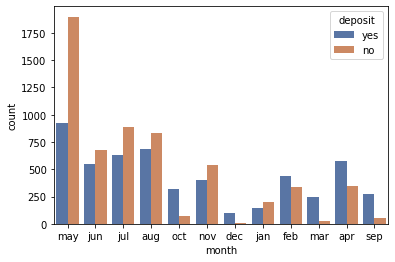

In [63]:
sns.countplot(fd["month"],hue=fd["deposit"],palette="deep")

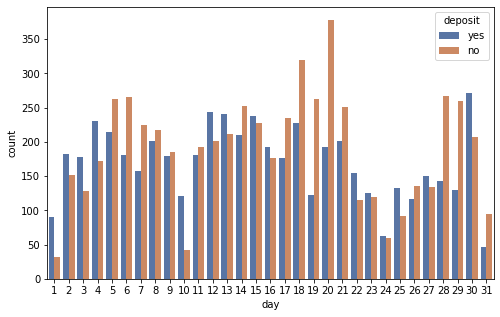

In [64]:
plt.figure(figsize=(8,5))
sns.countplot(fd["day"],hue=fd["deposit"],palette="deep")

# these 2 variables are not necessary for this data because we have not decided the customer buying or not the policy of fd for these variables
note: day and month not will the more impact of that variables we have to see that in plot graph

In [65]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning
 
fd.drop('month', axis=1, inplace=True)
 
fd.drop('day', axis=1, inplace=True)

In [66]:
fd.drop('contact', axis=1, inplace=True)

In [67]:
selcol(fd)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome',
       'deposit'],
      dtype='object')

# label coding the variables because machine can't understand categorical variables

In [68]:
fd['default'] = fd['default'].map( {'yes':1, 'no':0} )
fd["housing"]=fd['housing'].map({'yes':1, 'no':0})
fd["loan"] = fd['loan'].map({'yes':1, 'no':0})

fd["deposit"] = fd['deposit'].map({'yes':1, 'no':0})


In [69]:
selcol(fd)

Index(['job', 'marital', 'education', 'poutcome'], dtype='object')

In [70]:
fun(fd,"poutcome")

,count,ratio
poutcome,,
failure,1228,11.001613
other,8863,79.403333
success,1071,9.595055


In [71]:
col(fd)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'deposit'],
      dtype='object')

In [72]:
bank_dummy=pd.get_dummies(data=fd,columns=["job","marital","poutcome","education"],prefix=(["job","marital","poutcome","education"]))

In [73]:
bank_dummy.head(2)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,deposit,...,marital_divorced/widow,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,education_primary,education_secondary,education_tertiary,education_unknown
0,59,0,2343,1,0,1042,1,-1,0,1,...,0,1,0,0,1,0,0,1,0,0
1,56,0,45,0,0,1467,1,-1,0,1,...,0,1,0,0,1,0,0,1,0,0


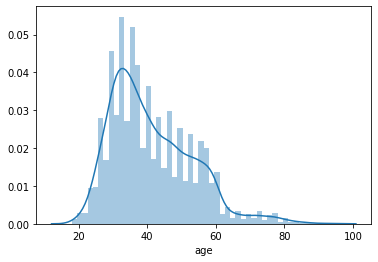

In [74]:
sns.distplot(bank_dummy["age"])

In [75]:
corr=bank_dummy.corr()

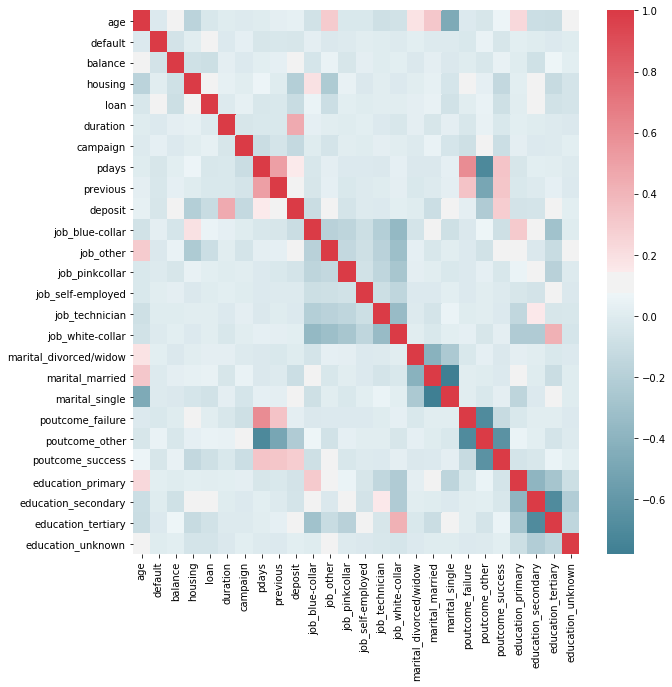

In [76]:
# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap)

In [77]:
corr_deposite = pd.DataFrame(corr['deposit'])
corr_deposite

,deposit
age,0.034901
default,-0.040680
balance,0.081129
housing,-0.203888
loan,-0.110580
duration,0.451919
campaign,-0.128081
pdays,0.151593
previous,0.139867
deposit,1.000000


In [78]:
corr_deposite.sort_values(by = 'deposit', ascending = False)*100#corelation of that deposit variable

,deposit
deposit,100.000000
duration,45.191936
poutcome_success,28.664161
pdays,15.159252
job_other,14.440757
previous,13.986712
marital_single,9.463220
education_tertiary,9.459839
balance,8.112859
age,3.490093


In [79]:
feature=bank_dummy.drop(["deposit"],1)


In [80]:
target=bank_dummy[["deposit"]]

In [81]:
feature1=list(feature)


In [82]:
sc=StandardScaler()

In [83]:
feature[feature1]=sc.fit_transform(feature[feature1])

In [84]:
feature=feature[feature1]

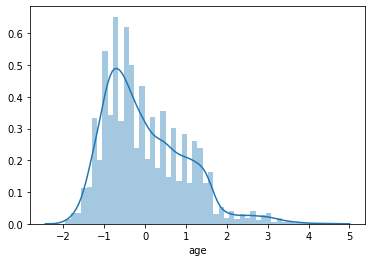

In [85]:
sns.distplot(feature["age"])

In [86]:
target

,deposit
0,1
1,1
2,1
3,1
4,1
...,...
11157,0
11158,0
11159,0
11160,0


In [87]:
feature1=feature.drop(columns="duration")

In [88]:
feature_train1,feature_test1,target_train1,target_test1=train_test_split(feature1,target,test_size=.2,random_state=1)

In [89]:
feature_train,feature_test,target_train,target_test=train_test_split(feature,target,test_size=.2,random_state=1)

In [90]:
print("training feature ",feature_train.shape)
print("testing feature ",feature_test.shape)
print("target feature",target_train.shape)
print("target test ",target_test.shape)

training feature  (8929, 25)
testing feature  (2233, 25)
target feature (8929, 1)
target test  (2233, 1)


In [91]:
# DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
#                            min_samples_split=2, min_samples_leaf=1, 
#                            min_weight_fraction_leaf=0.0, max_features=None, 
#                            random_state=None, max_leaf_nodes=None, 
#                            min_impurity_decrease=0.0, 
#                            min_impurity_split=None, 
#                            class_weight=None, 
#                            presort=False)
#gini means gain maximum to detect the root node and less entropy detect the root node

In [92]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV


parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[2,4,6,8,9,10,11,12],
              'class_weight':('balanced', None),
              'presort':(False,True)
             }


tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters, cv=10, verbose=2, n_jobs=-1)
gsearch.fit(feature_train,target_train)


Fitting 10 folds for each of 256 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   51.3s


KeyboardInterrupt: 

In [ ]:
gsearch.best_params_

In [ ]:
gsearch.best_score_

In [ ]:
tree_model1 = tree.DecisionTreeClassifier(random_state=1, max_depth=10,min_samples_split=2,
                                  presort=True, criterion="entropy")

In [ ]:
tree_model1.fit(feature_train,target_train)

In [ ]:
print("training accuracy ",tree_model1.score(feature_train,target_train))
print("testing accuracy ",tree_model1.score(feature_test,target_test))

In [ ]:
feature_imp1=pd.DataFrame({"Features":feature_train.columns, "Impo":tree_model1.feature_importances_*100}).sort_values("Impo",ascending=False)

In [ ]:
feature_imp1

In [ ]:
test_pred=tree_model1.predict(feature_test)

In [ ]:
train_pred=tree_model1.predict(feature_train)

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
imp_var=feature_imp1[:8][["Features"]]

In [ ]:
imp_var

In [ ]:
var_selection=["duration",
"poutcome_success",
"housing",
"balance",
"age",
"pdays",
"campaign",
"previous"]

In [ ]:
var_selection


In [ ]:
fun(fd,"poutcome")

In [ ]:
fun(bank_dummy,"poutcome_success")

In [ ]:
fd.rename(columns={"poutcome":"poutcome_success"},inplace=True)

In [ ]:
newdata=fd[var_selection]

In [ ]:
#perform this data per form on analysis

In [ ]:
newdata

In [ ]:
print(classification_report(target_test,test_pred))

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = tree.DecisionTreeClassifier(max_depth=max_depth)
    rf.fit(feature_train,target_train)#train the data
    train_pred = rf.predict(feature_train)#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(feature_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

In [ ]:
gsearch.best_params_

In [ ]:
maxdepth=4

In [ ]:

min_samples_splits = np.arange(2,10)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
    rf.fit(feature_train,target_train)#train the data
    train_pred = rf.predict(feature_train)#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(feature_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("min samples split")
plt.show()

In [ ]:
tree_model2 = tree.DecisionTreeClassifier(random_state=1, max_depth=4,min_samples_split=2,
                                  presort=True, criterion="entropy")

In [ ]:
tree_model2.fit(feature_train,target_train)

In [ ]:
tree_model2.score(feature_test,target_test)

In [ ]:
tree_model2.score(feature_train,target_train)

In [ ]:
feature_imp2=pd.DataFrame({"Features":feature_train.columns, "Impo":tree_model2.feature_importances_*100}).sort_values("Impo",ascending=False)

In [ ]:
feature_imp2

In [ ]:
feature_imp1

In [ ]:
! pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


In [ ]:
plt.figure(figsize=(12,10))
tree.plot_tree(tree_model1);

In [ ]:
feature_cols=feature.columns

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
tree.plot_tree(tree_model1,
               feature_names = feature_cols,class_names=["0","1"],filled = True);
fig.savefig('imagename.png')

In [ ]:
newdata.head()

In [ ]:
newdata["deposit"]=fd["deposit"]

In [ ]:
newdata.head(50)

In [ ]:
prob=tree_model1.predict_proba(feature_train)

In [ ]:
pd.DataFrame(prob[:,1])

In [ ]:
feat_pred=tree_model1.predict(feature_train)
feature_train["prob_0"]=tree_model1.predict_proba(feature_train)[:,1]
feature_train["actual"]=target_train
feature_train["predicted"]=feat_pred

In [ ]:
feature_train

In [ ]:
#feature_train["Rank"]=pd.qcut(feature_train["prob_0"], 10, labels=np.arange(0,10,1))


In [ ]:
feature_train["Rank"]=pd.qcut(feature_train["prob_0"],5,labels=np.arange(0,5,1))

In [ ]:
feature_train.shape

In [ ]:
feature_train[["Rank"]]

In [ ]:
feature_train["Numb"]=5
feature_train["Decile"]=feature_train["Numb"]-feature_train["Rank"].astype("int")
pd.DataFrame(feature_train.groupby("Decile").apply(lambda x:pd.Series({
    "min_score"  :x["prob_0"].min(),
    "max_score"  :x["prob_0"].max(),
    "Event"      :x["actual"].sum(),
    "Non_event"  :x["actual"].count()-x["actual"].sum(),
    "Total"      :x["actual"].count()
})))

In [ ]:
feature_train[["Numb","Rank","Decile"]]

# apply random forest on these data to check better accuracy
1. random forest is also called ensemble technique

2. they were used bagging technique--- it is cobination of boot strap and aggration 

3. bootstarp is a subsample of the ensemble model or random samples various

4. aggreagation is a combination of sub sample then they will predict better result


In [ ]:
feature_train=feature_train.drop(columns=['prob_0', 'actual', 'predicted', 'Rank', 'Numb','Decile'])

In [ ]:
import time
import random
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ensemble=RandomForestClassifier()

In [ ]:
ensemble.fit(feature_train,target_train)

In [ ]:
feature_test.shape
target_test.shape

In [ ]:
feature_train.columns

In [ ]:
print("training accuracy ",ensemble.score(feature_train,target_train))
print("testing accuracy ",ensemble.score(feature_test,target_test))

# we have to seen that training accuracy is 100 percent but testing accuracy is .81 this not good for mi9ne data because traing and tewsting accuracy not much higher difference in the training and testing dta set

# 1. nestimators means no of trees in the data
2. max depth of the model
3. min sample leafs
4. min sample split
5. max features

In [ ]:

n_estimators = np.arange(10,200,10)#no of trees selected in random forest
train_results = []#make to empty list
test_results = []
for estimator in n_estimators:#create loop
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)#model
    rf.fit(feature_train,target_train)#train the data
    train_pred = rf.predict(feature_train)#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(feature_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(n_estimators, train_results,"b" , label="Train AUC")
line2 = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

# we have select no. of estimator 20,15,25 ( trees are selected)

In [ ]:
max_depths = np.arange(1,32,5)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(feature_train,target_train)#train the data
    train_pred = rf.predict(feature_train)#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(feature_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

# maxdepth of variables cut are 5

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(feature_train,target_train)#train the data
    train_pred = rf.predict(feature_train)#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(feature_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

# .20 percent sample leaf

In [ ]:

min_samples_splits = np.arange(0.1,1.0,0.1)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(feature_train,target_train)#train the data
    train_pred = rf.predict(feature_train)#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(feature_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("min samples split")
plt.show()

# 0.2 minimum samples split

In [ ]:
ensemble1=RandomForestClassifier(random_state=1,n_estimators=20,min_samples_split=0.1,min_samples_leaf=0.2,
                                 max_depth=5)

In [ ]:
ensemble1.fit(feature_train,target_train)

In [ ]:
print("training accuracy ",ensemble1.score(feature_train,target_train))
print("testing accuracy ",ensemble1.score(feature_test,target_test))

# var importance

In [ ]:
feature_en1=pd.DataFrame({"feature":list(feature_train.columns),"impo":ensemble1.feature_importances_*100}).sort_values("impo",ascending=False)

In [ ]:
feature_en1

In [ ]:
#duration variable have more impact on the data we can drop that var then check importance of var...

In [ ]:

n_estimators = np.arange(10,200,10)#no of trees selected in random forest
train_results = []#make to empty list
test_results = []
for estimator in n_estimators:#create loop
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)#model
    rf.fit(feature_train1,target_train1)#train the data
    train_pred = rf.predict(feature_train1)#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(feature_test1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(n_estimators, train_results,"b" , label="Train AUC")
line2 = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

In [ ]:
#n estimators 20

In [ ]:
max_depths = np.arange(1,32,5)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(feature_train1,target_train1)#train the data
    train_pred = rf.predict(feature_train1)#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(feature_test1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

# max depth 6,7

In [ ]:

min_samples_splits = np.arange(0.1,1.0,0.1)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(feature_train1,target_train1)#train the data
    train_pred = rf.predict(feature_train1)#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(feature_test1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("min samples split")
plt.show()

# min samplesplit=0.1

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(feature_train1,target_train1)#train the data
    train_pred = rf.predict(feature_train1)#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(feature_test1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

# sampleleaf 0.10

In [ ]:
ensemble2=RandomForestClassifier(random_state=1,n_estimators=20,min_samples_split=0.1,min_samples_leaf=0.1,
                                 max_depth=6)

In [ ]:
ensemble3=RandomForestClassifier(random_state=1,n_estimators=20,min_samples_split=0.1,min_samples_leaf=0.1,
                                 max_depth=7)

In [ ]:
ensemble2.fit(feature_train1,target_train1)

In [ ]:
ensemble3.fit(feature_train1,target_train1)

In [ ]:
print("training accuracy ",ensemble2.score(feature_train1,target_train1))
print("testing accuracy ",ensemble2.score(feature_test1,target_test1))

In [ ]:
print("training accuracy ",ensemble3.score(feature_train1,target_train1))
print("testing accuracy ",ensemble3.score(feature_test1,target_test1))

In [ ]:
feature_en2=pd.DataFrame({"feature":list(feature_train1.columns),"impo":ensemble2.feature_importances_*100}).sort_values("impo",ascending=False)

In [ ]:
feature_en3=pd.DataFrame({"feature":list(feature_train1.columns),"impo":ensemble2.feature_importances_*100}).sort_values("impo",ascending=False)

In [ ]:
feature_en2

In [ ]:
feature_en3

# while check accuracy 

In [ ]:
fit_rf = RandomForestClassifier(random_state=42)
start = time.time()
param_dist = {'max_depth':[5,6,8,10],
              'min_samples_split':[2,4,6,10],
              'n_estimators':[15,20,25,30,35,40],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = -1, verbose=1)

cv_rf.fit(feature_train,target_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

In [ ]:
cv_rf.best_params_

In [ ]:
ensemble4=RandomForestClassifier(random_state=1,n_estimators=35,min_samples_split=4,
                                 max_depth=10,criterion="entropy",max_features="auto",bootstrap=True)

In [ ]:
ensemble4.fit(feature_train,target_train)

In [ ]:
print("training accuracy ",ensemble4.score(feature_train,target_train))
print("testing accuracy ",ensemble4.score(feature_test,target_test))

In [ ]:
feature_en4=pd.DataFrame({"feature":list(feature_train.columns),"impo":ensemble4.feature_importances_*100}).sort_values("impo",ascending=False)

In [ ]:
feature_en4

In [ ]:
fit_rf = RandomForestClassifier(random_state=42)
start = time.time()
param_dist = {'max_depth':[5,6,8,10],
              'min_samples_split':[2,4,6,10],
              'n_estimators':[15,20,25,30,35,40],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = -1, verbose=1)

cv_rf.fit(feature_train1,target_train1)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

In [ ]:
ensemble5=RandomForestClassifier(random_state=1,n_estimators=40,min_samples_split=6,
                                 max_depth=10,criterion="entropy",max_features="auto",bootstrap=True)

In [ ]:
ensemble5.fit(feature_train1,target_train1)

In [ ]:
print("training accuracy ",ensemble5.score(feature_train1,target_train1))
print("testing accuracy ",ensemble5.score(feature_test1,target_test1))

In [ ]:
feature_en5=pd.DataFrame({"feature":list(feature_train1.columns),"impo":ensemble5.feature_importances_*100}).sort_values("impo",ascending=False)

In [ ]:
feature_en5.shape

In [ ]:
var_sel=feature_en5.to_csv(r"C:\machine learning\random forest\varsel_rand.csv")

In [ ]:
var_sel=feature_en4.to_csv(r"C:\machine learning\random forest\varsel_rand1.csv")

In [ ]:
feature_en5[:17][["feature"]].T

In [ ]:
selected_var=["age","poutcome_success","balance","pdays","housing","campaign","previous","poutcome_other","job_other","poutcome_failure","loan","marital_married","marital_single","education_tertiary","job_blue-collar",
              "education_primary","job_white-collar"]

# final selected variable to apply random model

In [ ]:
new_feature=feature[selected_var]

In [ ]:
feature_train2,feature_test2,target_train2,target_test2=train_test_split(new_feature,target,test_size=.2,random_state=1)

In [ ]:
final_ensemble=RandomForestClassifier(random_state=1,n_estimators=40,min_samples_split=6,
                                 max_depth=10,criterion="entropy",max_features="auto",bootstrap=True)

In [ ]:
final_ensemble.fit(feature_train2,target_train2)

In [ ]:
print("training accuracy ",final_ensemble.score(feature_train2,target_train2))
print("testing accuracy ",final_ensemble.score(feature_test2,target_test2))

In [ ]:
feature_final=pd.DataFrame({"feature":list(feature_train2.columns),"impo":final_ensemble.feature_importances_*100}).sort_values("impo",ascending=False)

In [ ]:
feature_final.shape

# we have to seen that select 24 variables accuracy is same under testing and traing 

training accuracy is 73 and testing accuracy is 67
but other side we have select 17 variables accuracy is also same when the variables are reduced it no effect on accuracy

just before situation is over fitting then we have to handle the situation

In [ ]:
feature[selected_var].columns

In [ ]:
fd.columns

In [ ]:
fd1.shape

In [ ]:
y_pred=final_ensemble.predict(feature_test2)
feature_test2["p_1"]=final_ensemble.predict_proba(feature_test2)[:,1]
feature_test2["y_actual"]=target_test2
feature_test2["y_pred"]=y_pred
feature_test2["Rank"]=pd.qcut(feature_test2["p_1"], 10, labels=np.arange(0,10,1))
feature_test2["Numb"]=10
feature_test2["Decile"]=feature_test2["Numb"]-feature_test2["Rank"].astype("int")
profiletest=pd.DataFrame(feature_test2.groupby("Decile").apply(lambda x:pd.Series({
    "min_score"  :x["p_1"].min(),
    "max_score"  :x["p_1"].max(),
    "Event"      :x["y_actual"].sum(),
    "Non_event"  :x["y_actual"].count()-x["y_pred"].sum(),
    "Total"      :x["y_actual"].count()
})))

In [ ]:
profiletest

In [ ]:
feature_train2_1=feature_train2#make a copy 

In [ ]:
feature_train2.columns

In [ ]:
#training data working after modelimplementation
train_pred=final_ensemble.predict(feature_train2)

In [ ]:
prob_1=final_ensemble.predict_proba(feature_train2)

In [ ]:
prob=pd.DataFrame(prob_1[:,1])
prob

In [ ]:
feature_train2_1.columns

In [ ]:
#feature_train2=feature_train2.drop(columns=['prob_1'])
#feature_train2.columns

In [ ]:
y_pred=final_ensemble.predict(feature_train2)
feature_train2["p_1"]=final_ensemble.predict_proba(feature_train2)[:,1]
feature_train2["actual_deposit"]=target_train2
feature_train2["predicted"]=y_pred



In [ ]:
feature_train2.iloc[:,-3:]


In [ ]:
sns.distplot(feature_train2["p_1"],color="r")

In [ ]:
feature_train2[["predicted","actual_deposit"]]

In [ ]:
fun(feature_train2,"predicted")

In [ ]:
sns.countplot(feature_train2["predicted"],palette="dark")


In [ ]:
fun(feature_train2,"actual_deposit")

In [ ]:
sns.countplot(feature_train2["actual_deposit"],palette="deep")

# deposit report
1. while training ==>>
 actual data deposit records shows bank 
 no deposit customers are 4708 52.72% and deposit customers are 4221 i.e 47.27%
 random model or machinepredicted
 no deposit customers are 5933 66.44% and deposit customers are 2996 33.55%
 

In [ ]:
feature_test2.iloc[:,-6:]

In [ ]:
feature_test2.rename(columns={"y_actual":"actual_deposit","y_pred":"predicted"},inplace=True)

In [ ]:
feature_test2.columns

In [ ]:
new_fd1=new_fd

In [ ]:
new_fd1=pd.concat([feature_train2,feature_test2],ignore_index=True)


In [ ]:
new_fd=pd.concat([feature_train2,feature_test2],ignore_index=True)


In [ ]:
new_fd1.columns

In [ ]:
#drop unnecessary columns
new_fd=new_fd.drop(columns=['Rank', 'Numb','Decile'])

In [ ]:
#drop unnecessary columns
new_fd1=new_fd1.drop(columns=['Rank', 'Numb','Decile'])

In [ ]:
new_fd.shape

In [ ]:
feature_train2.shape

In [ ]:
feature_test2.columns

In [ ]:
#data prepartion on new data set

In [ ]:
new_fd1.columns

In [ ]:
new_fd1.columns

In [ ]:
new_fd.columns

In [ ]:
new_fd.shape

In [ ]:
new_fd.head(2)

In [ ]:
new_fd.columns

In [ ]:
fd.columns

In [ ]:
print(new_fd.shape)
print(fd.shape)

In [ ]:
selection_variable_final=['age', 'job', 'marital', 'education','balance', 'housing','loan'
                         ,'campaign', 'pdays', 'previous', 'poutcome_success']

In [ ]:
newdata_fd=fd[selection_variable_final]

In [ ]:
fun(fd,"deposit")

In [ ]:
new_fd1.columns

In [ ]:
fun(new_fd1,"actual_deposit")

In [ ]:
sns.countplot(new_fd1["actual_deposit"],palette="deep")

In [ ]:
fun(new_fd1,"predicted")

In [ ]:
sns.countplot(new_fd1["predicted"],palette="deep")

In [ ]:
newdata_fd1=newdata_fd

In [ ]:
newdata_fd1["actual_deposit"]=new_fd1["actual_deposit"]

In [ ]:
newdata_fd1["predicted_deposit"]=new_fd1["predicted"]

In [ ]:
fun(newdata_fd1,"predicted_deposit")

In [ ]:
newdata_fd1.columns

In [ ]:
sns.scatterplot(newdata_fd1["age"],newdata_fd1["predicted_deposit"])

In [ ]:
sns.scatterplot(newdata_fd1["age"],newdata_fd1["actual_deposit"])

In [ ]:
newdata_fd1.head()

In [ ]:
newdata_fd1.columns

In [ ]:
newdata_fd1.boxplot(column="balance",        # Column to plot
                 by= "predicted_deposit",         # Column to split upon
                 figsize= (8,8))

In [ ]:
sns.scatterplot(newdata_fd1["predicted_deposit"],newdata_fd1["balance"],palette="dry")

In [ ]:
newdata_fd1.columns

In [ ]:
sns.countplot(newdata_fd1["marital"],hue=newdata_fd1["predicted_deposit"],hue_order=[1,0])

In [ ]:
fun2(newdata_fd1,"predicted_deposit","marital")

In [ ]:
newdata_fd1.columns

In [ ]:
newdata_fd1["probabilty_1(deposit)"]=new_fd1["p_1"]

In [ ]:
newdata_fd1.columns

In [ ]:
newdata_fd1[["probabilty_1(deposit)"]]

In [ ]:
actual=fun(newdata_fd1,"actual_deposit")
act=actual.to_csv(r"C:\machine learning\random forest\actual.csv")

In [ ]:
actual=fun(newdata_fd1,"predicted_deposit")
act=actual.to_csv(r"C:\machine learning\random forest\predict.csv")

In [ ]:
df=newdata_fd1[["actual_deposit","predicted_deposit"]].head()

In [ ]:
mar_status=fun2(newdata_fd1,"actual_deposit","marital")

In [ ]:
m_act=mar_status.to_csv(r"C:\machine learning\random forest\married_status_actual.csv")

In [ ]:
sns.countplot(newdata_fd1["marital"],hue=newdata_fd1["actual_deposit"])
plt.title("actual deposit chart")
#sns.scatterplot(newdata_fd1["predicted_deposit"],newdata_fd1["balance"])

In [ ]:
mar_status=fun2(newdata_fd1,"predicted_deposit","marital")
m_act=mar_status.to_csv(r"C:\machine learning\random forest\married_status_pred.csv")

In [ ]:
mar_status

In [ ]:
sns.countplot(newdata_fd1["marital"],hue=newdata_fd1["predicted_deposit"])

In [ ]:
newdata_fd1.columns

In [ ]:
job=fun2(newdata_fd1,"actual_deposit","job")

m_act=job.to_csv(r"C:\machine learning\random forest\job_status_actual.csv")

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(newdata_fd1["job"],hue=newdata_fd1["actual_deposit"])

In [ ]:
job=fun2(newdata_fd1,"predicted_deposit","job")

m_act=job.to_csv(r"C:\machine learning\random forest\job_status_pred.csv")

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(newdata_fd1["job"],hue=newdata_fd1["predicted_deposit"],palette="hot")

In [ ]:
newdata_fd1.columns

In [ ]:
d=newdata_fd1.actual_deposit.value_counts()

In [ ]:
#probab of deposit actual
d[1]/(d[0]+d[1])*100#47 percent customers  deposit

In [ ]:
d=newdata_fd1.c.value_counts()

In [ ]:
d[1]/(d[0]+d[1])*100

In [ ]:
sns.countplot(newdata_fd1["actual_deposit"])

In [ ]:
fun(newdata_fd1,"actual_deposit")

In [ ]:
sns.countplot(newdata_fd1["predicted_deposit"])

In [ ]:
df=newdata_fd1.to_csv(r"C:\machine learning\random forest\data.csv")